Scipy stats 
This notebook will cover below

1.Overview of the scipy-stats 

https://docs.scipy.org/doc/scipy/reference/stats.html  [1]

https://ja.wikipedia.org/wiki/%E5%88%86%E6%95%A3%E5%88%86%E6%9E%90 [2]

https://agency-star.co.jp/column/scipy  [3]

http://plaza.umin.ac.jp/~beehappy/stat/com-anova.html [4]

http://plaza.umin.ac.jp/~beehappy/stat/comment.html#error [5]

https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php [6]

2.Using ANOVA to test datasets to decide if hypothesis that I set is supported or not

http://www.saturingi.gr.jp/seminar/statistical/vol3.pdf

1. Overview of the scipy-stats

According to the official document, this library has " a large number of probability distributions, summary and frequency statistics, correlation functions and statistical tests, masked statistics, kernel density estimation, quasi-Monte Carlo functionality, and more."

Importing libralies from scipy, statistics can be performed and analyse hypothesis on data. If the data has 2 groups and to analyse if there is significant difference between 2 groups, null hypothesis should be denied then it is safe to say there is significant difference between 2 groups. 

Dataset can be in different formats thus the right testing needs to be decided first to see if the testing works with the dataset or not. For instatnce, t-test can be a great test if data is about parid samples, t-test is suitable to test if there are significant difference between 2 groups.  

Analysis of variance (ANOVA) is a collection of statistical models and their associated estimation procedures (such as the "variation" among and between groups) used to analyze the differences among means. If the dataset contains 3 groups to be analysed, ANOVA is suitable than t-test. 

The reason why t-test is not suitable to test if there are 3 groups to be analysed is as follows. 

e.g., there are 3 groups (A,B and C) and p value is set to 0.05
Between AB, BC and AC, the statistic to be significant different in one of the combination will be caluculated as below. 
1-(1-0.05)*(1-0.05)*(1-0.05) and p value is 0.1426. This leads to type 1 error: null hypothesis gets denied where null hyphothesis should not be denied, meaning there is not significant difference in fact. 



2.Using ANOVA to test datasets to decide if hypothesis that I set is supported or not

I will test if there is any significant difference in Sepal.Width with iris dataset from skcikt learn by using ANOVA and will post hoc test if my hyphothesis is supported or not. 

P value is set to 0.05 to support that null hyphothesis is denied to show that there is significant difference in 3 species with Sepal.Width. 

Firstly, in order to test with ANOVA, there are 6 assamptions to be met. I will check if the sepal.width dataset will meet these assamptions first then test if the null hypothesis is denied or not. 

Secondly, I will conduct post hoc test if the anova testing result is supported or not.






In [1]:
# Data frames.
import pandas as pd

# Plotting.
import seaborn as sns

# Stats.
import scipy.stats as ss

# Numerical arrays.
import numpy as np

# Collections.
import collections as co

# Specials.
import scipy.special as spec

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


x = df.data
t = df.target
columns_names = df.feature_names

columns_names = df.feature_names

<br>

### Assumption 1: Dependent variable

"Your dependent variable should be measured at the interval or ratio level (i.e., they are continuous). Examples of variables that meet this criterion include revision time (measured in hours), intelligence (measured using IQ score), exam performance (measured from 0 to 100), weight (measured in kg), and so forth. " [6]


***


In [4]:
# The dependent variable.
dependent = df['sepal_width']
dependent
#This shows that sepal width were measured in cm thus it is met 1st assumption.

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [5]:
dependent.describe()


count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal_width, dtype: float64

<br>

### Assumption 2: Independent variable

"Your independent variable should consist of two or more categorical, independent groups." [6]

***

In [6]:
# Independent variable.
independent = df['species']
independent
#This shows the data has 3 independent groups

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

<br>

### Assumption 3: 

You should have independence of observations, which means that there is no relationship between the observations in each group or between the groups themselves.  [6]
***

This dataset took 150 samples thus there is no relationship between observations in each group or between the groups themselves.


<br>

### Assumption 4: 

"There should be no significant outliers. Outliers are simply single data points within your data that do not follow the usual pattern." [6]

***

<AxesSubplot:xlabel='sepal_width', ylabel='species'>

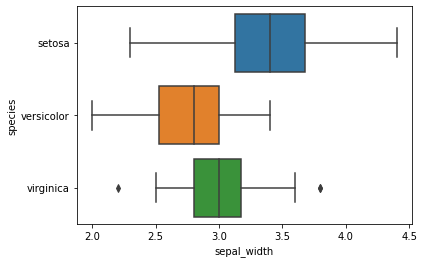

In [7]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(x=dependent, y=independent)

https://www.youtube.com/watch?v=I17dg22TUA8

https://en.wikipedia.org/wiki/Null_hypothesis